# <font color='red' style='font-size: 40px;'> 1) Trabalhando com Spark SQL - Parte 1</font>
<hr style='border: 2px solid red;'>

# Carregando dados de um arquivo para um Dataframe

> 1. Vamos analisar dados sobre quilometragem em bikes na India, buscando realizar:
    
    - Entender as cidades que mais possuem quilômetros rodados
    - Entender as cidades com as médias maiores (ou a maior)
    - Entender as cidades com as máximas maiores (ou a maior)
    - Entender as cidades com as mínimas menores (ou a maior)
    - Verificar qual a cidade tem mais registros e analisá-los
        - Analisar a média, máximo e mínimo desta cidade
        - Analisar pelo campo que descreve as bikes
        - Analisar se as bikes na maioria sao de primeiro ou segundo donos
        - Gerando gráficos sobre os dados

In [1]:
# Importando os dados
from pyspark.sql import SparkSession

# Criando um objeto sparksession e um appName
sparkSession = SparkSession.builder.appName('bikes').getOrCreate()

In [2]:
# Fazendo a leitura do arquivo bikes.csv
bikes = sparkSession.read.option('header', 'True').csv('Bikes.csv')

In [4]:
# Criando uma tabela temporária em memória com os dados e utilizando consulta SQL

bikes.createOrReplaceTempView('tab_bikes')
sparkSession.sql('select * from tab_bikes').show()

+--------------------+--------+---------+----------+------------+---+-----+-------------+
|           bike_name|   price|     city|kms_driven|       owner|age|power|        brand|
+--------------------+--------+---------+----------+------------+---+-----+-------------+
|TVS Star City Plu...| 35000.0|Ahmedabad|   17654.0| First Owner|3.0|110.0|          TVS|
|Royal Enfield Cla...|119900.0|    Delhi|   11000.0| First Owner|4.0|350.0|Royal Enfield|
|Triumph Daytona 675R|600000.0|    Delhi|     110.0| First Owner|8.0|675.0|      Triumph|
|TVS Apache RTR 180cc| 65000.0|Bangalore|   16329.0| First Owner|4.0|180.0|          TVS|
|Yamaha FZ S V 2.0...| 80000.0|Bangalore|   10000.0| First Owner|3.0|150.0|       Yamaha|
|    Yamaha FZs 150cc| 53499.0|    Delhi|   25000.0| First Owner|6.0|150.0|       Yamaha|
|Honda CB Hornet 1...| 85000.0|    Delhi|    8200.0| First Owner|3.0|160.0|        Honda|
|Hero Splendor Plu...| 45000.0|    Delhi|   12645.0| First Owner|3.0|100.0|         Hero|
|Royal Enf

In [6]:
# Selecionando dados para analisar a maior média de quilometros percorridos
sparkSession.sql('select city, avg(kms_driven) as media_km from tab_bikes group by city order by media_km desc').show()

+------------------+------------------+
|              city|          media_km|
+------------------+------------------+
|     Muzaffarnagar|          403833.0|
|           Vidisha|          172082.0|
|            Ranoli|          135000.0|
|           Navsari|          111224.0|
|         Osmanabad|           80000.0|
|         Kartarpur|           75000.0|
|             Latur|           71000.0|
|          Motihari|           69000.0|
|         Gangaghat|           65000.0|
|             Hisar|           65000.0|
|         Darbhanga|           61331.5|
|           Jaunpur|           61000.0|
|            Jaipur| 60106.93346573982|
|           Raiwala|           60000.0|
|       Chikamaglur|           60000.0|
|             Morbi|           60000.0|
|             Nabha|           59154.0|
|Thiruvananthapuram|58166.666666666664|
|             Rasra|           58000.0|
|              Bhuj|           54400.0|
+------------------+------------------+
only showing top 20 rows



In [9]:
# Selecionando dados para analisar a maior quilometragem atingida
sparkSession.sql('select city, max(kms_driven) as maximo_km from tab_bikes group by city order by maximo_km desc').show(1)

+-----+---------+
| city|maximo_km|
+-----+---------+
|Anand|  99999.0|
+-----+---------+
only showing top 1 row



In [11]:
# Selecionando dados para analisar a menor quilometragem atingida
sparkSession.sql('select city, min(kms_driven) as minimo_km from tab_bikes group by city order by minimo_km desc').show(1)

+------+---------+
|  city|minimo_km|
+------+---------+
|Dhubri|   9900.0|
+------+---------+
only showing top 1 row



In [12]:
# Selecionando dados para analisar a média de potencia das bicicletas e total por cidade
sparkSession.sql('select brand, avg(power) as potencia_media, count(*) as total from tab_bikes group by brand order by total desc').show()

+---------------+------------------+-----+
|          brand|    potencia_media|total|
+---------------+------------------+-----+
|          Bajaj|196.31454561669491|11213|
|           Hero|116.17996231155779| 6368|
|  Royal Enfield| 366.1045955002393| 4178|
|         Yamaha|169.35010214504595| 3916|
|          Honda|152.67314990512335| 2108|
|         Suzuki| 138.2445355191257| 1464|
|            TVS| 170.9943865276664| 1247|
|            KTM| 346.7595171773445| 1077|
|Harley-Davidson| 758.2048846675713|  737|
|       Kawasaki| 570.8860759493671|   79|
|        Hyosung|             400.0|   64|
|        Benelli| 380.2857142857143|   56|
|       Mahindra| 192.9090909090909|   55|
|        Triumph| 893.0769230769231|   26|
|         Ducati|1016.1363636363636|   22|
|            BMW|            463.75|   16|
|           Jawa|             295.0|   10|
|             MV|             872.5|    4|
|         Indian|1353.3333333333333|    3|
|          Ideal|             250.0|    2|
+----------

In [15]:
# Selecionando dados para analisar a cidade de Bajaj
bajaj = sparkSession.sql("select * from tab_bikes where brand = 'Bajaj'")

In [16]:
# Criando uma tabela temporária apenas com os dados de Bajaj
bajaj.createOrReplaceTempView('tab_bikes2')

In [17]:
# Identificando o tipo de objeto
type(bajaj)

pyspark.sql.dataframe.DataFrame

In [18]:
# Selecionando os dados da cidade de Bajaj
sparkSession.sql('select count(*) from tab_bikes2').show()

+--------+
|count(1)|
+--------+
|   11213|
+--------+



,owner,total
0,First Owner,29964
1,Second Owner,2564
2,Third Owner,108
3,Fourth Owner Or More,12


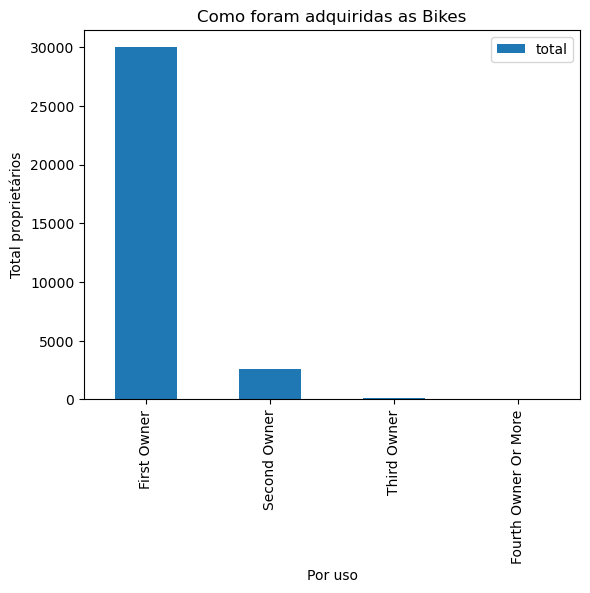

In [21]:
# Plotando os dados 
import matplotlib.pyplot as plt

bajaj_df = sparkSession.sql('select owner, count(*) as total from tab_bikes group by owner order by 2 desc')
bajaj_df = bajaj_df.toPandas()
display(bajaj_df.head())

bajaj_df.plot(kind = 'bar', x = 'owner', y= 'total')
plt.title('Como foram adquiridas as Bikes')
plt.xlabel('Por uso')
plt.ylabel('Total proprietários')
plt.show()

# <font color='red' style='font-size: 40px;'> 2) Trabalhando com Spark SQL - Parte 2</font>
<hr style='border: 2px solid red;'>